# Import Libraries

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg_preprocess
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess
from tensorflow.keras.preprocessing.image import ImageDataGenerator



# Class Distribution

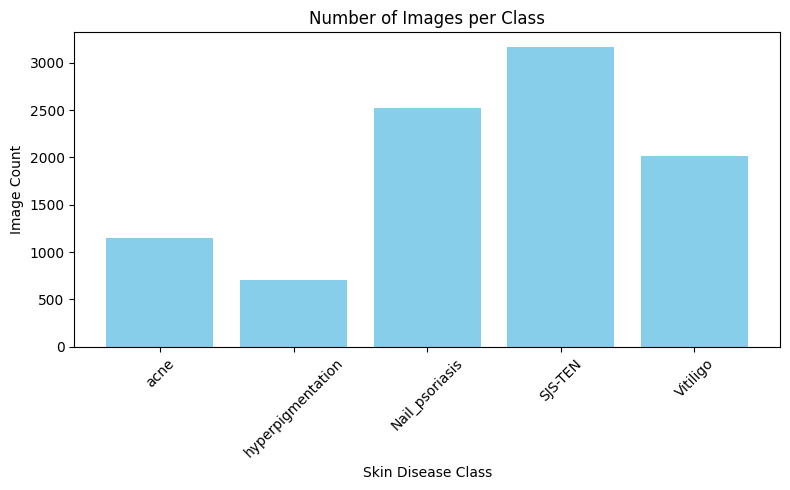

In [3]:
import os
import matplotlib.pyplot as plt

dataset_dir = "/content/drive/MyDrive/skin_disease_dataset/Skin Disease Dataset"
class_names = os.listdir(dataset_dir)

# Count images per class
class_counts = {}
for class_name in class_names:
    class_path = os.path.join(dataset_dir, class_name)
    if os.path.isdir(class_path):
        image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        class_counts[class_name] = len(image_files)

# Plot distribution
plt.figure(figsize=(8, 5))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.title("Number of Images per Class")
plt.xlabel("Skin Disease Class")
plt.ylabel("Image Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Visualize Sample Images from Each Class

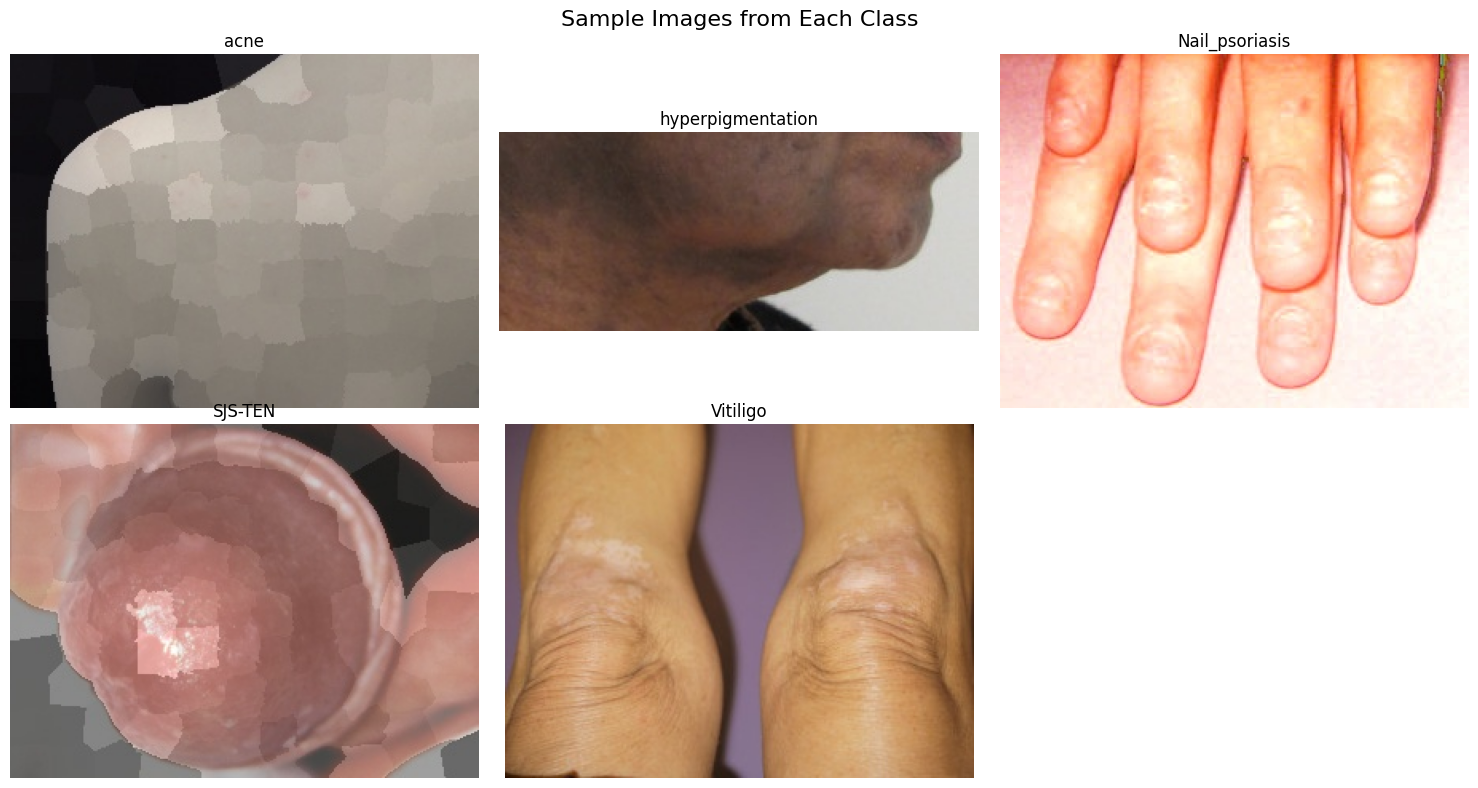

In [4]:
import matplotlib.image as mpimg
import random

plt.figure(figsize=(15, 8))

for i, class_name in enumerate(class_names):
    class_path = os.path.join(dataset_dir, class_name)
    image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    img_file = random.choice(image_files)
    img_path = os.path.join(class_path, img_file)

    img = mpimg.imread(img_path)
    plt.subplot(2, 3, i + 1)
    plt.imshow(img)
    plt.title(class_name)
    plt.axis('off')

plt.suptitle("Sample Images from Each Class", fontsize=16)
plt.tight_layout()
plt.show()


# Check Image Dimensions

In [5]:
from PIL import Image

all_shapes = []

for class_name in class_names:
    class_path = os.path.join(dataset_dir, class_name)
    image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    for img_file in image_files[:10]:  # check a sample of 10 per class
        img_path = os.path.join(class_path, img_file)
        with Image.open(img_path) as img:
            all_shapes.append(img.size)

unique_shapes = set(all_shapes)
print("Unique image shapes found (width, height):", unique_shapes)


Unique image shapes found (width, height): {(294, 322), (294, 222), (494, 422), (194, 122)}


# Check for Corrupted Images

In [6]:
corrupted = []

for class_name in class_names:
    class_path = os.path.join(dataset_dir, class_name)
    image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    for img_file in image_files:
        img_path = os.path.join(class_path, img_file)
        try:
            img = Image.open(img_path)
            img.verify()  # just verify, do not load
        except Exception:
            corrupted.append(img_path)

print("Number of corrupted images:", len(corrupted))


Number of corrupted images: 0


# **Preprocessing**

In [7]:
# Image size and batch
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Data augmentation + normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # split for train/val
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)


# Create train_generator and val_generator

In [9]:
train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    dataset_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


Found 7640 images belonging to 5 classes.
Found 1908 images belonging to 5 classes.


# Check class indices

In [10]:
print("Class indices (labels):", train_generator.class_indices)

Class indices (labels): {'Nail_psoriasis': 0, 'SJS-TEN': 1, 'Vitiligo': 2, 'acne': 3, 'hyperpigmentation': 4}
